In [30]:

#Importing libraries

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import requests

from bs4 import BeautifulSoup

import geopandas as gpd

In [31]:
#reading Indian shapely file 

data_map = gpd.read_file('Indian_States.shp')

print(data_map.head())

#printing 25 number state 

data_map['st_nm'].iloc[25] 

                      st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...


'Punjab'

In [32]:

#Extracting data from Indian govt. site 

url = 'https://www.mohfw.gov.in/'

#Request to extract data from site 

web_content = requests.get(url).content

#applying html parser to parse html content  

soup = BeautifulSoup(web_content, "html.parser")

def extract_contents(row):
    return [x.text.replace('\n', '') for x in row]

stats = [] 

all_rows = soup.find_all('tr')

#print(all_rows)

for row in all_rows:

    stat = extract_contents(row.find_all('td')) 

    if len(stat) == 6:

        stats.append(stat)

In [33]:
#Converting html data into dataframe 

new_cols = ["S. No.", "Name of State / UT","Active Cases*","Cured/Discharged/Migrated*","Deaths**","Total Confirmed cases*"]

state_data = pd.DataFrame(data = stats, columns = new_cols)

state_data.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1268,2349,62,3679
2,3,Arunachal Pradesh,3,1,0,4
3,4,Assam,1083,185,4,1272
4,5,Bihar,2084,1710,21,3815


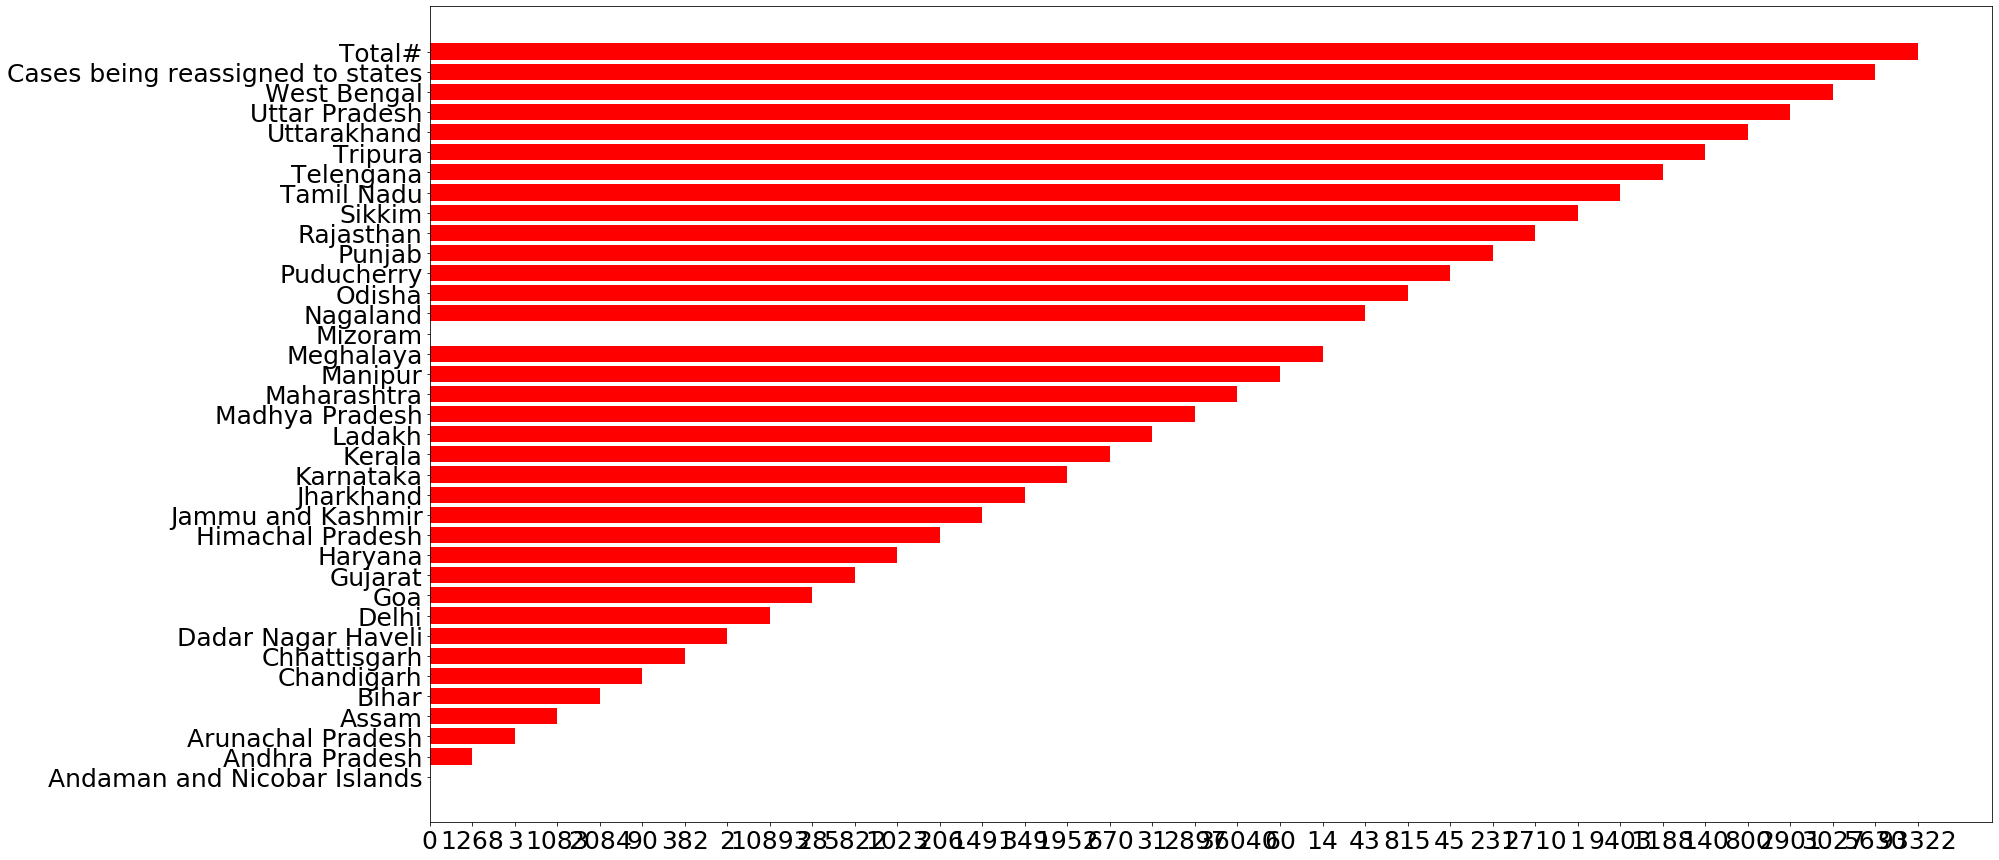

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28,15))
plt.barh(state_data["Name of State / UT"],state_data['Active Cases*'],color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

C:\Users\91914\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


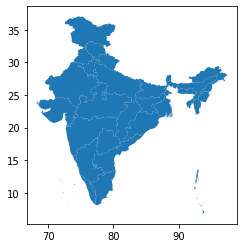

In [34]:

#Correction required to match names in both datasets 

data_map.rename(columns = {'st_nm':'Name of State / UT'}, inplace = True)

data_map['Name of State / UT'] =data_map['Name of State / UT'].str.replace('&','and')

data_map['Name of State / UT'].iloc[0]  = 'Andaman and Nicobar Islands'

data_map['Name of State / UT'].iloc[1] = 'Arunachal Pradesh'

data_map['Name of State / UT'].iloc[6] = 'Dadar Nagar Haveli'

data_map['Name of State / UT'].iloc[23] = 'Delhi'

data_map['Name of State / UT'].iloc[29]='Telengana'

#Plotting map of The India 

data_map.plot()

In [35]:
#Merging both datasets together

merged = pd.merge(data_map, state_data, on = 'Name of State / UT')

merged.drop('S. No.', axis = 1, inplace = True)

merged.head()

,Name of State / UT,geometry,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0,33,0,33
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3,1,0,4
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",1083,185,4,1272
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2084,1710,21,3815
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",90,199,4,293


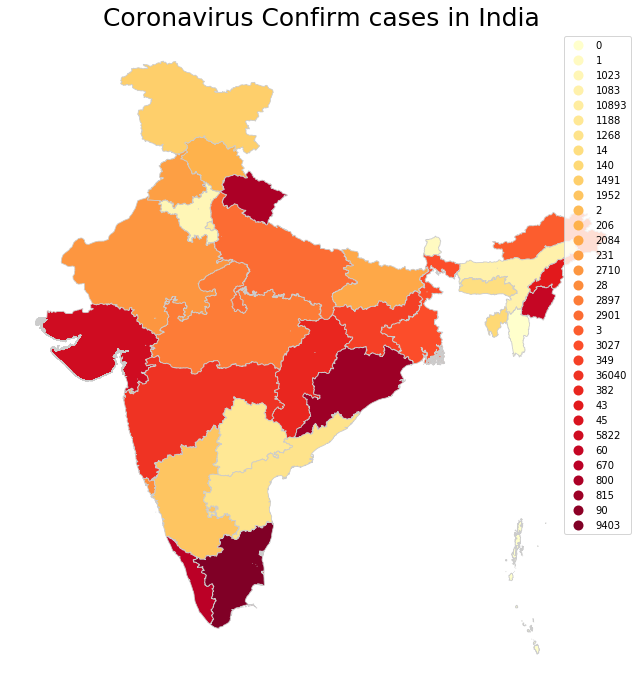

In [39]:

#plotting coronavirus cases on map 

fig, ax = plt.subplots(1, figsize=(20, 12))

ax.axis('off')

#Set the title of the map

ax.set_title('Coronavirus Confirm cases in India', fontsize=25)
merged.plot(column = 'Active Cases*',cmap='YlOrRd',linewidth=0.8, ax=ax, edgecolor='0.8',legend = True)

#Showing plot of India with coronavirus cases 

plt.show()